# Preprocessing of Trial Data

## Raw Data

The following table presents the columns and a brief description of each field.


<table>
  <tr>
    <td>Participant Assignment ID</td>
    <td>Subject ID</td>
  </tr>
  <tr>
    <td>Condition (Informed or not)</td>
    <td>Indicates whether the subject was informed or not about the existence of a random task</td>
  </tr>
  <tr>
    <td>State</td>
    <td>Stage of the experiment: trial, free exploration or testing phase</td>
  </tr>
  <tr>
    <td>Trial</td>
    <td>Number of trial</td>
  </tr>
  <tr>
    <td>Block Trial</td>
    <td>Macro trial used during trial and testing phases to differentiate between tasks</td>
  </tr>
  <tr>
    <td>Trial Start Time</td>
    <td>Time the trial started</td>
  </tr>
  <tr>
    <td>Monster</td>
    <td>Type of monster as well as value along 2-Dimensions (Bunny, Squid, GreenMonster, Bear)</td>
  </tr>
  <tr>
    <td>Family</td>
    <td>Type of monster</td>
  </tr>
  <tr>
    <td>Category</td>
    <td>Type of task: catergory1D, categoryIgnore1D, category2D, categoryRandom</td>
  </tr>
  <tr>
    <td>Preferred Food</td>
    <td>Type of food the monster eats. This indicates what is the right answer</td>
  </tr>
  <tr>
    <td>Choice</td>
    <td>Type of food selected by a subject</td>
  </tr>
  <tr>
    <td>Correct</td>
    <td>Indicates whether the choice by the subject was correct</td>
  </tr>
  <tr>
    <td>Response Time</td>
    <td>Time spent to answer this trial</td>
  </tr>
</table>

An example of a trial in raw form:

```
A100Y89FZO4J0B:3FTOP5WARG367O4MAQ5FL69K51FJ0Y,0,train,1,1,1257,Bunny_5_1,Bunny,category2D,waffles,pancakes,False,1776
```

## Numpy arrays

The arrays are used throughout the notebooks, they only extract the values of some of columns specified above. The columns retrieved from the files are the following:

* 0 - Id
* 1 - Condition (Informed or Uninformed)
* 2 - State (training, exploration, testing)
* 8 - Task category
* 11 - Correct or Incorrect

They are all converted into a unique integer number:

* Id: Each user has a unique integer id
* Condition: Uninformed - 0, Informed - 1
* State: exploration - 0, training - 2, testing - 1
* Task category: category1D - 0, categoryIgnore1D - 1, category2D - 2, categoryRandom - 3
* Incorrect - 0, Correct - 1

The final array is of dimension Subjects x Instance (Rows) x Attributes (Columns).

* splitCsvF - Free Exploration
    * csvIntF would contain (user,category,correct)
* splitCsvFTI - Free Exploration with Training for those that are Informed (Exploration Phase)
    * informed contains (user,category,correct) for informed users (free exploration)
* splitCsvFTU - Free Exploration with Training for those that are Uninformed (Exploration Phase)
    * uninformed contains (user,category,correct) for informed users (free exploration)
* splitCsvSI - Strategic for those that are Informed (Exploration Phase)
    * informedSE contains (user,category,correct) for informed users (free exploration)
* splitCsvSU - Strategic for those that are Uninformed (Exploration Phase)
    * uninformedSE contains (user,category,correct) for uninformed users (free exploration)

And for training phase

* splitCsvFTTI - Free Exploration with Training for those that are Informed
    * informedFTT contains (user,category,correct) for informed users (training)
* splitCsvFTTU - Free Exploration with Training for those that are Uninformed
    * uninformedFTT contains (user,category,correct) for uninformed users (training)
* splitCsvSTI - Strategic for those that are Informed
    * informedST contains (user,category,correct) for informed users (training)
* splitCsvSTU - Strategic for those that are Uninformed
    * uninformedST contains (user,category,correct) for uninformed users (training)

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rcParams
import pandas as pd
import warnings

from scipy.stats import beta

from ipywidgets import widgets
from IPython.html.widgets import *

warnings.filterwarnings('ignore')
rcParams.update({'font.size': 15})
#plt.style.use('ggplot')
#plt.style.use('seaborn-dark-palette')
plt.style.use('fivethirtyeight')

float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
np.set_printoptions(precision=2)

import io
from IPython.nbformat import current

def execute_notebook(nbfile):
    
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    
    ip = get_ipython()
    
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)

In [ ]:
def stringToInt(arr, position, values):
    for i, v in enumerate(values):
        arr[arr[:,position] == v, position] = i
    return arr

## Free Exploration Preprocessing

In [ ]:
csvFileF = '../monster task data/free/monsters_data_free_only_052417.csv'

# Get all columns
#csv = np.genfromtxt(csvFile, dtype=np.string_, delimiter=',', skip_header=1)
# Only id(0), condition(1), state(2), category(8), correct(11) 
csvF = np.genfromtxt(csvFileF, dtype=np.string_, delimiter=',', usecols=(0,1,2,8,11), skip_header=1)

# Get unique ids
ids = [i for i in np.unique(csvF[:,0]) ]

# Get conditions
cond = [co for co in np.unique(csvF[:,1])]

# Get unique phases, whether trial, free exploration or testing phase
phases = [p for p in np.unique(csvF[:,2]) ] 
print(phases)

# Get categories
#categories = [c for c in np.unique(csv[:,3])]
categories = [b'category1D', b'categoryIgnore1D', b'category2D', b'categoryRandom']
# For converting string to int boolean
bo = [b'False', b'True']

csvIntF = csvF.copy()
# Convert fields to ints for easy processing
for i,j in enumerate([ids, cond, phases, categories, bo]):
    csvIntF = stringToInt(csvIntF, i, j)

csvIntF = csvIntF.astype('int')
# Get only those in free exploration phase

csvIntF = csvIntF[csvIntF[:,2]==0]

# Remove phase column (2) (and for now also the condition column (1))
#csvIntF would contain (user,category,correct)
csvIntF = np.delete(csvIntF, (1,2), axis=1)
# Split by user
splitCsvF = [csvIntF[csvIntF[:,0]==i] for i in np.unique(csvIntF[:,0])]



#csvIntF,splitCsvF would contain (user,category,correct)

## Free Exploration with Training Preprocessing

In [ ]:
# For file with training stage
csvFileFT = '../monster task data/free_trained/monsters_data_free_familiarize_05232017.csv'
#Only id(0), condition(1), state(2), category(8), correct(11) 
csvFT = np.genfromtxt(csvFileFT, dtype=np.string_, delimiter=',', usecols=(0,1,2,8,11), skip_header=1)

#Finding unique values of user,condition,state
ids = [i for i in np.unique(csvFT[:,0]) ]
cond = [co for co in np.unique(csvFT[:,1])]
phases = [p for p in np.unique(csvFT[:,2]) ]
print(phases)


# Convert fields to ints for easy processing
for i,j in enumerate([ids, cond, phases, categories, bo]):
    csvFT = stringToInt(csvFT, i, j)

csvIntFT = csvFT.copy()
csvIntFT = csvIntFT.astype('int')


# Get only those in free exploration phase
csvIntFTE = csvIntFT[csvIntFT[:,2]==0]

# Get a copy for splitting by condition (below)
csvIntFTECond = csvIntFTE.copy()

# Remove phase column (2) (and for now also the condition column (1))
#csvINFTE contains (user,category,correct)
csvIntFTE = np.delete(csvIntFTE, (1,2), axis=1)

# Split by user
splitCsvFTE = [csvIntFTE[csvIntFTE[:,0]==i] for i in np.unique(csvIntFTE[:,0])]


# Split by condition
csvIntFTECond = np.delete(csvIntFTECond, 2, axis = 1)
informed = csvIntFTECond[csvIntFTECond[:,1]==0]
uninformed = csvIntFTECond[csvIntFTECond[:,1]==1]

#informed contains (user,category,correct) for informed users (free exploration)
informed = np.delete(informed, 1, axis=1)
#uninformed contains (user,category,correct) for uninformed users (free exploration)
uninformed = np.delete(uninformed, 1, axis=1)

splitCsvFTI = [informed[informed[:,0]==i] for i in np.unique(informed[:,0])]
splitCsvFTU = [uninformed[uninformed[:,0]==i] for i in np.unique(uninformed[:,0])]

#####
# Additional preprocessing (Training phase)
#####

# Load behavioral trajectories (csvIntFT)
# Get only those in training phase
csvIntFTT = csvIntFT[csvIntFT[:,2]==1]

# Get a copy for splitting by condition (below)
csvIntFTTCond = csvIntFTT.copy()

# Remove phase column (2) (and for now also the condition column (1))
csvIntFTT = np.delete(csvIntFTT, (1,2), axis=1)

# Split by condition
# Get rid of phase column
csvIntFTTCond = np.delete(csvIntFTTCond, 2, axis = 1)
# Split by informed/uninformed
informedFTT = csvIntFTTCond[csvIntFTTCond[:,1]==0]
uninformedFTT = csvIntFTTCond[csvIntFTTCond[:,1]==1]
informedFTT = np.delete(informedFTT, 1, axis=1)
uninformedFTT = np.delete(uninformedFTT, 1, axis=1)
# Split by user
splitCsvFTTI = [informedFTT[informedFTT[:,0]==i] for i in np.unique(informedFTT[:,0])]
splitCsvFTTU = [uninformedFTT[uninformedFTT[:,0]==i] for i in np.unique(uninformedFTT[:,0])]

## Strategic Learning Preprocessing

In [ ]:
csvFileS = '../monster task data/strategic/monsters_data_strategic_052217.csv'

# Only id(0), condition(1), state(2), category(8), correct(11) 
csvS = np.genfromtxt(csvFileS, dtype=np.string_, delimiter=',', usecols=(0,1,2,8,11), skip_header=1)
ids = [i for i in np.unique(csvS[:,0]) ]
cond = [co for co in np.unique(csvS[:,1])]
phases = [p for p in np.unique(csvS[:,2])]
print(phases)


# Convert fields to ints for easy processing
for i,j in enumerate([ids, cond, phases, categories, bo]):
    csvS = stringToInt(csvS, i, j)

csvIntS = csvS.copy()
csvIntS = csvIntS.astype('int')

# For testing phase
csvIntSTe = csvIntS.copy()

# Get only those in test phase
csvIntSTe = csvIntSTe[csvIntSTe[:,2]==1]

# Get only those in free exploration phase
csvIntSE = csvIntS.copy()
csvIntSE = csvIntSE[csvIntSE[:,2]==0]


# Get a copy for splitting by condition (below)
csvIntSECond = csvIntSE.copy()

# Remove phase column (2) (and for now also the condition column (1))
#csvIntSE contains (user,category,correct)
csvIntSE = np.delete(csvIntSE, (1,2), axis=1)

# Split by user
splitCsvSE = [csvIntSE[csvIntSE[:,0]==i] for i in np.unique(csvIntSE[:,0])]


# Split by condition for free exploration
csvIntSECond = np.delete(csvIntSECond, 2, axis = 1)
informedSE = csvIntSECond[csvIntSECond[:,1]==0]
uninformedSE = csvIntSECond[csvIntSECond[:,1]==1]
informedSE = np.delete(informedSE, 1, axis=1)
uninformedSE = np.delete(uninformedSE, 1, axis=1)

splitCsvSI = [informedSE[informedSE[:,0]==i] for i in np.unique(informedSE[:,0])]
splitCsvSU = [uninformedSE[uninformedSE[:,0]==i] for i in np.unique(uninformedSE[:,0])]

#####
# Additional preprocessing (Training phase)
#####

# Load behavioral trajectories (csvIntFT)
# Get only those in training phase
csvIntST = csvIntS[csvIntS[:,2]==2]

# Get a copy for splitting by condition (below)
csvIntSTCond = csvIntST.copy()

# Remove phase column (2) (and for now also the condition column (1))
csvIntST = np.delete(csvIntST, (1,2), axis=1)

# Split by condition
# Get rid of phase column
csvIntSTCond = np.delete(csvIntSTCond, 2, axis = 1)
# Split by informed/uninformed
informedST = csvIntSTCond[csvIntSTCond[:,1]==0]
uninformedST = csvIntSTCond[csvIntSTCond[:,1]==1]
informedST = np.delete(informedST, 1, axis=1)
uninformedST = np.delete(uninformedST, 1, axis=1)
# Split by user
splitCsvSTI = [informedST[informedST[:,0]==i] for i in np.unique(informedST[:,0])]
splitCsvSTU = [uninformedST[uninformedST[:,0]==i] for i in np.unique(uninformedST[:,0])]

<IPython.core.display.Javascript object>


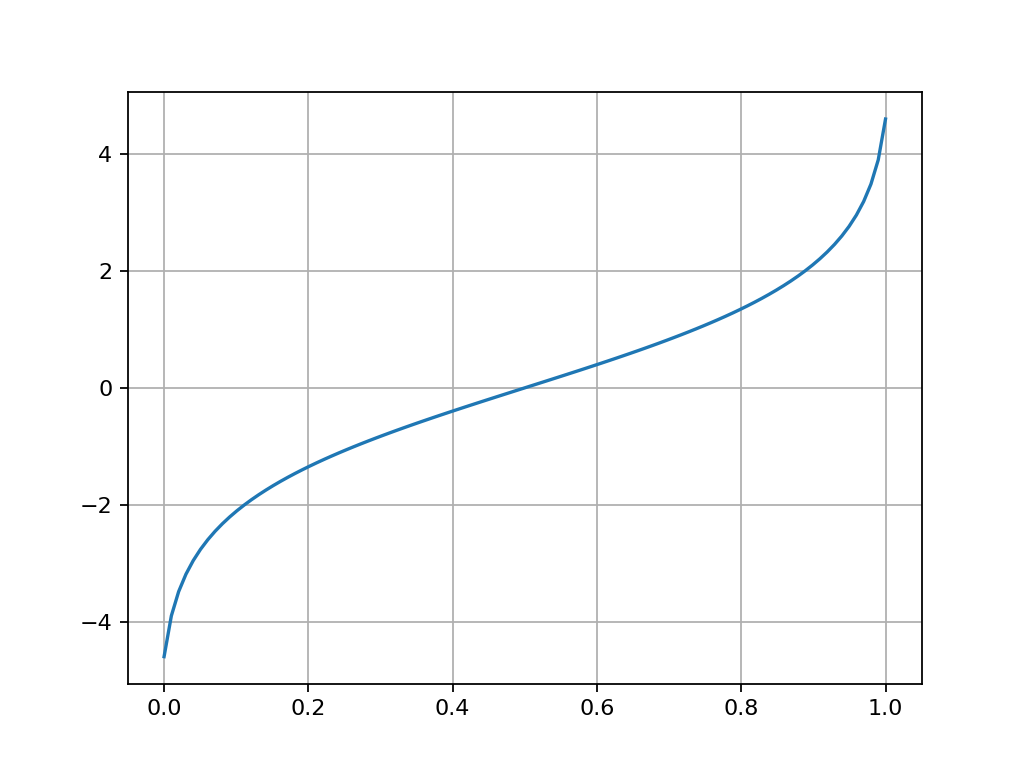

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

def logit(p):
    return np.log(p/(1-p))

a = logit(np.linspace(0.01,.99,100))
plt.plot(np.linspace(0,1,100), a)
plt.grid(which='both')
plt.show()